In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [28]:
data = pd.read_csv('../input/titanic/train.csv')

In [29]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
data.isnull().sum() #Age, Cabin have too much null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

> In train data, how many Survived?

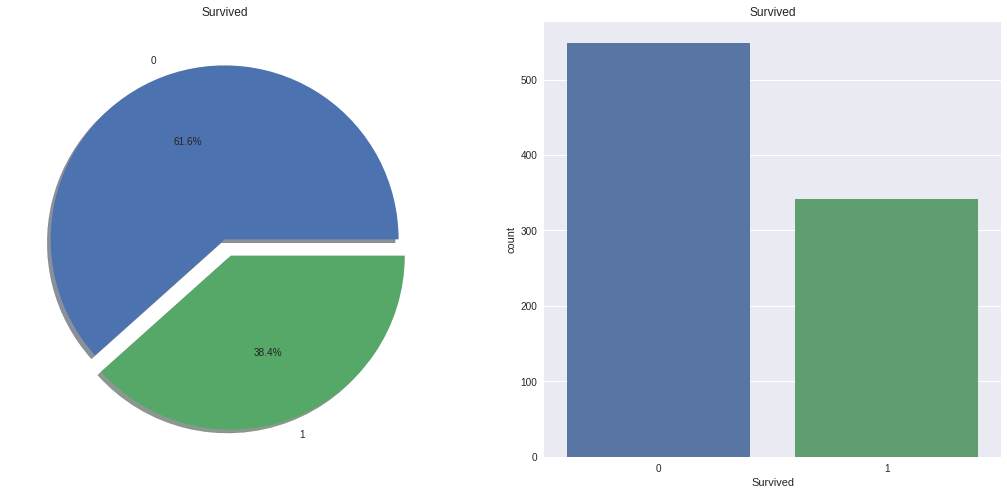

In [31]:
f, ax = plt.subplots(1,2, figsize = (18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct = '%1.1f%%',
                                        ax = ax[0], shadow = True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data = data, ax = ax[1])
ax[1].set_title('Survived')
plt.show()

In train data set, 38.4% of people survived
Dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't

To check the survival rate, Use the different features of the dataset

Fist understand the different types of features

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Types of Features

1. Categorical Features:
    A categorical variable is one that has two or more categories and each value
    in that feature can be categoriesed by them. For example, gender is a 
    categorical variable having two categories. Now we cannot sort or give any ordering to such variables.
    They are also known as Nominal Variables.
    -> Sex, Embarked
2. Ordinal Features:
    An ordinal variable is similar to categorical values, but the difference between
    them is that we can have relative ordering or sorting between the values.
    For example, pclass is a ordinal variable that have relative sort in the variable.
    -> Pclass
3. Continous Feature:
    A feature is said to be continous if it can take values between any two points or
    between the minimum or maximum values in the features column.
    -> Age


# Analysis about Features

1. ### Sex -> Categorical Feature

In train data, we can group Sex and Survived

In [33]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

### visualization

In [34]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

The number of men on the ship is lot more than the number of women.
Still the number of women saved is almost twice the number of males saved.


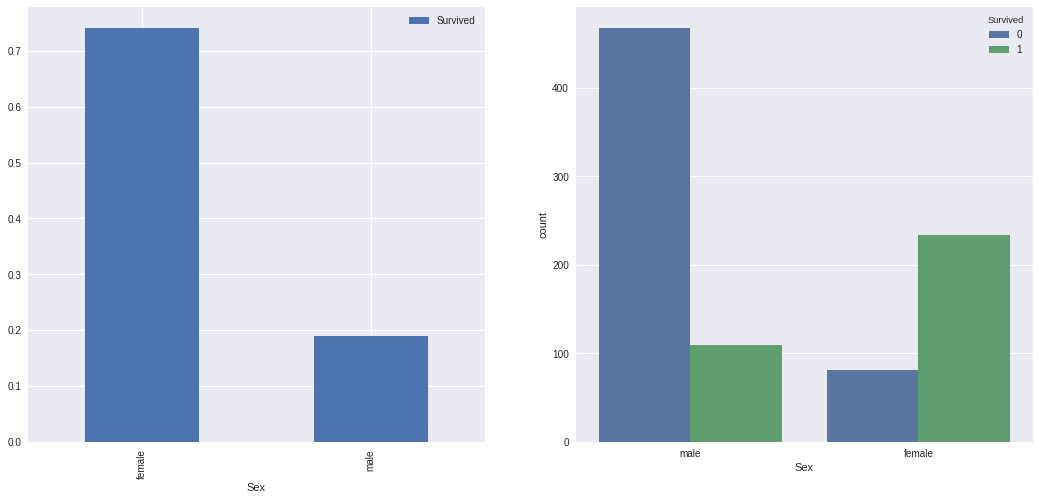

In [39]:
f, ax = plt.subplots(1,2, figsize = (18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
sns.countplot(data = data, x = 'Sex', hue = 'Survived')

The survival rates for a women on the ship os around 75% while that for men in around 18-19%.
This loos to be a very important feature for modeling.

But is it best?
Umm.. I don't know. Lets check other features.

Pclass -> Ordinary Feature

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [46]:
pd.crosstab(data['Pclass'], data['Survived'], margins = True).style.background_gradient(cmap = 'Blues')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


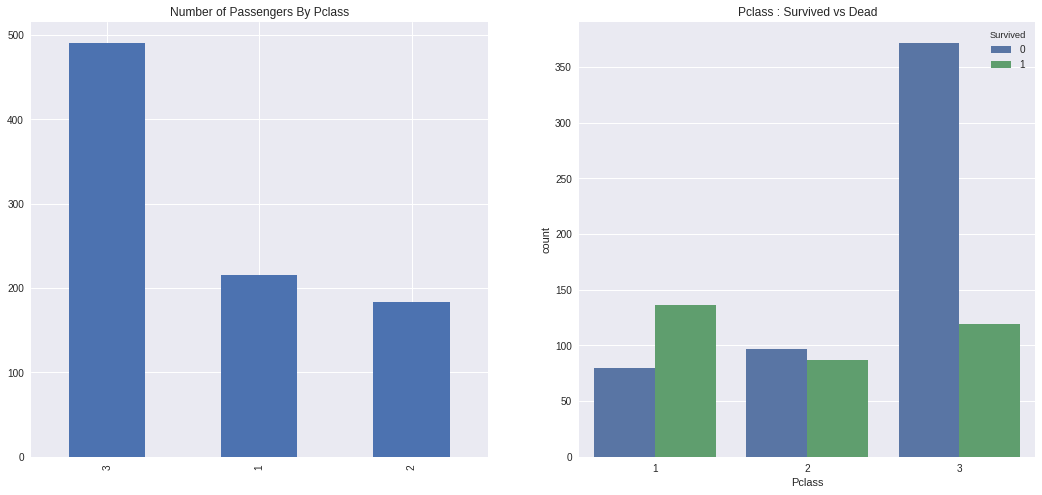

In [51]:
f, ax = plt.subplots(1,2, figsize = (18,8))
data['Pclass'].value_counts().plot.bar(ax = ax[0])
ax[0].set_title('Number of Passengers By Pclass')
sns.countplot(data = data, x = 'Pclass',hue = 'Survived')
ax[1].set_title('Pclass : Survived vs Dead')
plt.show()

<Figure size 1296x720 with 0 Axes>

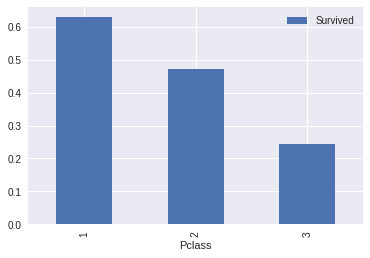

In [68]:
plt.figure(figsize = (18,10))
pd.DataFrame(data[['Pclass','Survived']].groupby(['Pclass']).sum()/data[['Pclass','Survived']].groupby(['Pclass']).count()).plot.bar()

People say Money cannot Buy Everything. But we can cleary see that passengers of Pclass 1 were given a very high priority while rescure.
Even though the number of passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around 25%.

For Pclass 1 is survived around 63% while for Pclass 2 is survived around 48%. So money and status matters. Such a materialistic world.

Check Survive & Sex

In [71]:
pd.crosstab([data['Sex'], data['Survived']],data['Pclass'],margins = True).style.background_gradient(cmap = 'Blues')

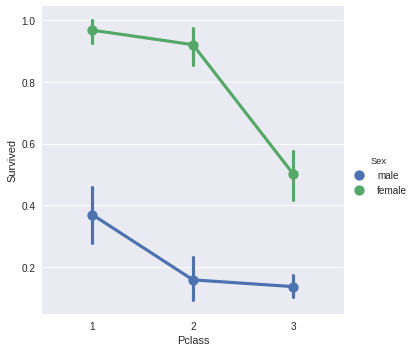

In [73]:
sns.factorplot(data = data, x = 'Pclass', y = 'Survived', hue = 'Sex')
plt.show()

We use FactorPlot in this case. Because they make the seperation of categorical values easy.

Looking at the CrossTab and the FactorPlot, we can easily infer that survival for Women from Pclass1 is about 95 - 96%, as only 3 out of 94 Women from Pclass1 died.

It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.

Looks like Pclass is also an important feature. Lets analyse other features.

Ages -> Continous Feature

In [76]:
data[['Age']].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


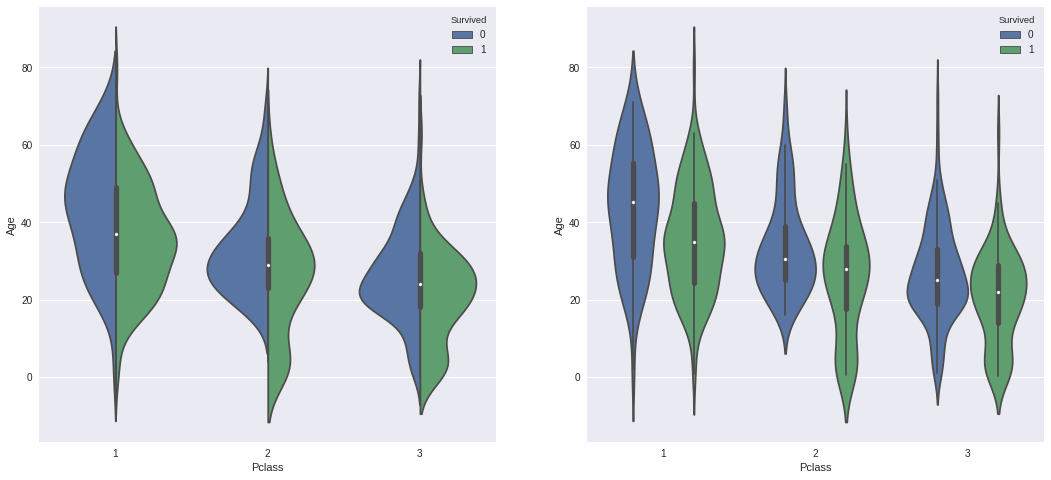

In [89]:
f, ax = plt.subplots(1,2, figsize = (18,8))
sns.violinplot('Pclass','Age', hue = 'Survived', data = data, split = True, ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
sns.violinplot(data = data, x = 'Sex',y = 'Age', hue = 'Survived', ax = ax[1])
ax[1].set_title('Pclass and Age vs Survived')